### Student Details

Student name: Akshata Bheemasamudra Mallikarjunappa

Student ID: 23164204

In [3]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Implement Logistic Regression

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [4]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) +
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [7]:
################################
# Class stub for you to fill the rest of the code

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # Defining the cost function for Logistic Regression
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

# Calculating the sigmoid activation function
    def activation(self, z):
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


In [8]:
# Import library to read the data
import pandas as pd

# Reading the iris data
df = pd.read_csv('iris_data.csv', header = 0)

In [9]:
# df.drop(' sepa_width', axis=0,inplace=True)
# df.drop(' petal_width',axis =0,inplace = True)
df.head()

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Reading the iris-setosa, iris-versicolor, sepal-length & petal-length data
# X is the features
X = df[(df[' class'] == 'Iris-setosa') | (df[' class'] == 'Iris-versicolor')][['sepal_length', ' petal_length']].values
# y has the species to which data is to be classified
y = df[(df[' class'] == 'Iris-setosa') | (df[' class'] == 'Iris-versicolor')][' class'].values
# 0 repts setosa and 1 repts versicolor
y = np.where(y == 'Iris-setosa',0,1)

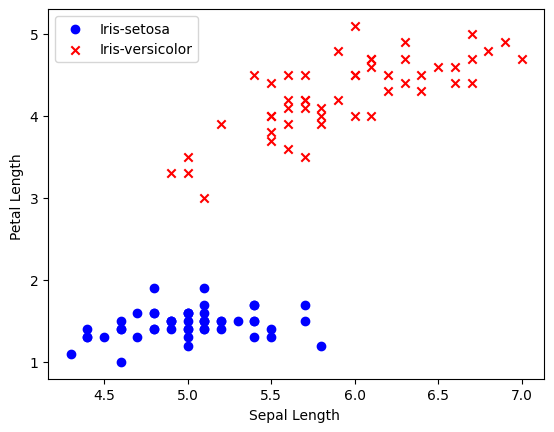

In [11]:
# Create a scatter plot
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Iris-setosa', c='blue', marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Iris-versicolor', c='red', marker='x')

# Add labels and a legend
plt.xlabel('Sepal Length ')
plt.ylabel('Petal Length ')
plt.legend(loc='best')

# Show the plot
plt.show()

In [12]:
# Training the LR algorithm defined above
LR = LogisticRegressionGD()
LR.train(X,y)

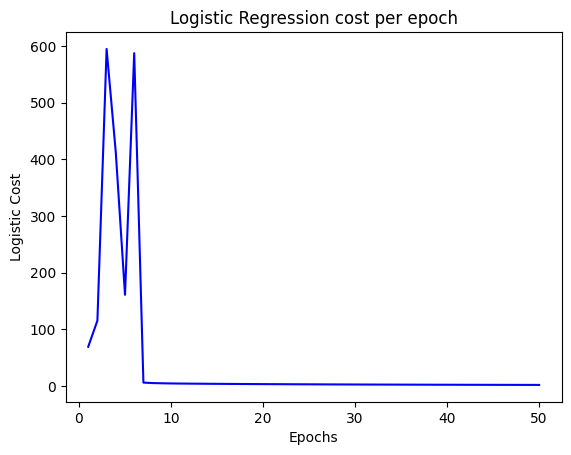

In [15]:
# Plotting the logistic cost per epoch of training

plt.plot(range(1,len(LR.cost_) + 1),LR.cost_,'b')
plt.xlabel('Epochs')
plt.ylabel("Logistic Cost")
plt.title('Logistic Regression cost per epoch')
plt.show()

Text(0, 0.5, 'petal length')

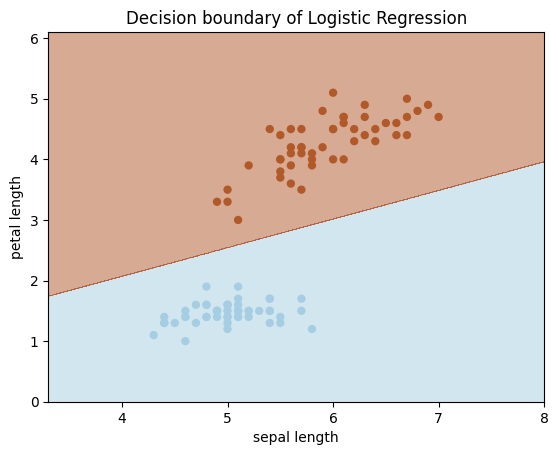

In [16]:
from plot_decision_boundary import plot_decision_boundary

plot_decision_boundary(X,y,LR)
plt.title('Decision boundary of Logistic Regression')
plt.xlabel('sepal length')
plt.ylabel('petal length')

# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

**1.**

In [17]:
# Reading the iris data file

data = pd.read_csv('iris_data.csv',header = 0)

In [18]:
data.head()

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# Loading all the samples from the iris data

X = data.iloc[:,2:4].values
z = data[' class'].map({'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2}).values


In [20]:
# cross-checking the assigned class labels
print(z)
type(z)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


numpy.ndarray

[Text(0.5, 1.0, 'Species classified acc to petal length & width')]

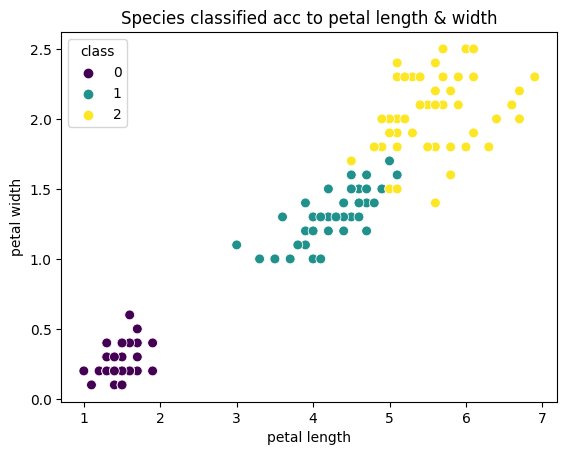

In [21]:
# Plotting the three classes of flowers w.r.t its features

import seaborn as sns

df = pd.DataFrame({'petal length': X[:,0], 'petal width': X[:,1], 'class':z})
sns.scatterplot(x = 'petal length' , y = 'petal width' , data = df , hue = 'class',  palette = 'viridis', s=50 ).set(title = 'Species classified acc to petal length & width')

**2.**

In [22]:
# Splitting the data into training and test sets using scikitlearn

from sklearn.model_selection import train_test_split

X_train, X_test, z_train, z_test = train_test_split(X,z,test_size = 0.30,stratify = z,random_state = 42)

**3.**

In [23]:
# Standardizing the data to ensure they are same units

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

[Text(0.5, 1.0, ' Scaled test data')]

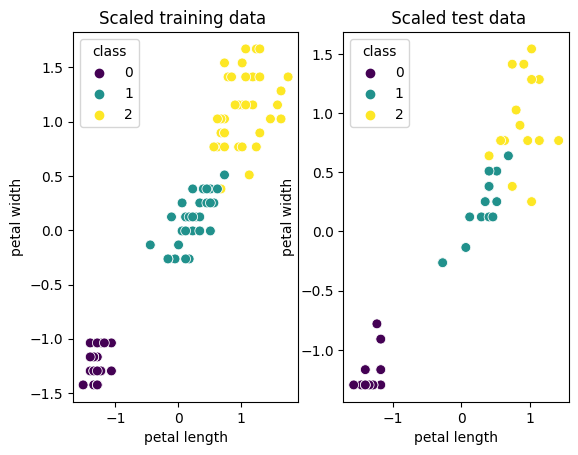

In [24]:
# Plotting the training and test data

df1 = pd.DataFrame({'petal length': X_train_scaled[:,0], 'petal width': X_train_scaled[:,1], 'class':z_train})
df2 = pd.DataFrame({'petal length': X_test_scaled[:,0], 'petal width': X_test_scaled[:,1], 'class':z_test})

fig, axes = plt.subplots(1,2)
sns.scatterplot(x = 'petal length' , y = 'petal width' , data = df1 , hue = 'class',  palette = 'viridis', s=50, ax = axes[0] ).set(title = 'Scaled training data ')
sns.scatterplot(x = 'petal length' , y = 'petal width' , data = df2 , hue = 'class',  palette = 'viridis', s=50, ax = axes[1] ).set(title = ' Scaled test data')

**4.& 5. Training & Decision Boundary of Training Data**

Accuracy score for the test data is 0.98


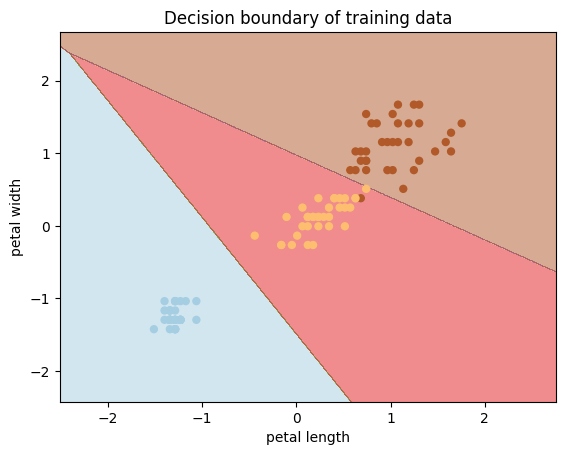

In [43]:
# Training the model using Logistic Regression function from scikitlearn

from sklearn.linear_model import LogisticRegression

#initializing logistic regression model
lr = LogisticRegression()

# training the logistic regression model
lr.fit(X_train_scaled,z_train)


from plot_decision_boundary import plot_decision_boundary

fig,  ax = plot_decision_boundary(X_train_scaled,z_train,lr)
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_title("Decision boundary of training data")

from sklearn.metrics import accuracy_score
z_pred_train = lr.predict(X_train_scaled)
accuracy = round(accuracy_score(z_train,z_pred_train),2)
print(f'Accuracy score for the test data is {accuracy}')

**Decision Boundary of Testing Data**

Text(0, 0.5, 'petal width')

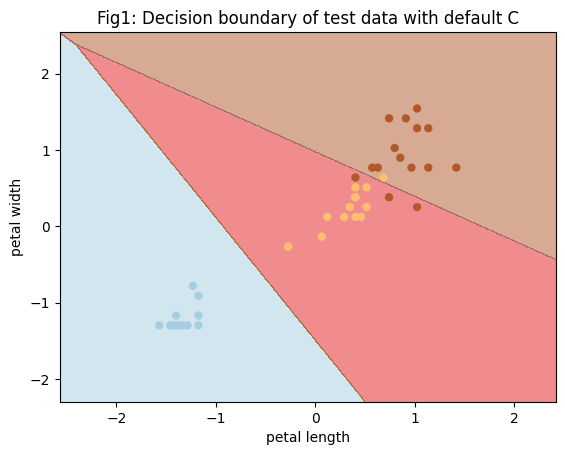

In [44]:
lr = LogisticRegression()

# training the model
lr.fit(X_train_scaled,z_train)

plot_decision_boundary(X_test_scaled,z_test,lr)
plt.title('Fig1: Decision boundary of test data with default C')
plt.xlabel('petal length')
plt.ylabel('petal width')



**6. Accuracy of test Data**

In [45]:
# Importing the sklearn.metrics to calculate the accuracy
from sklearn.metrics import accuracy_score

# calculating the accuracy by first predicting the values for test data
z_pred = lr.predict(X_test_scaled)
accuracy = round(accuracy_score(z_test,z_pred),2)
print(f'Accuracy score for the test data is {accuracy}')


Accuracy score for the test data is 0.91


**Question:** Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of the regularisation strength, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.

1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

**For personal reference**

**Without Standardizing/Normalizing**

(<Figure size 640x480 with 1 Axes>, <Axes: >)

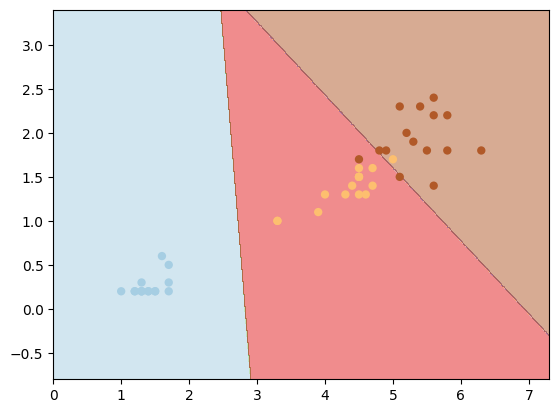

In [46]:
# C parameter is the default

lr_c0 = LogisticRegression()
lr_c0.fit(X_train,z_train)
plot_decision_boundary(X_test,z_test,lr_c0)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

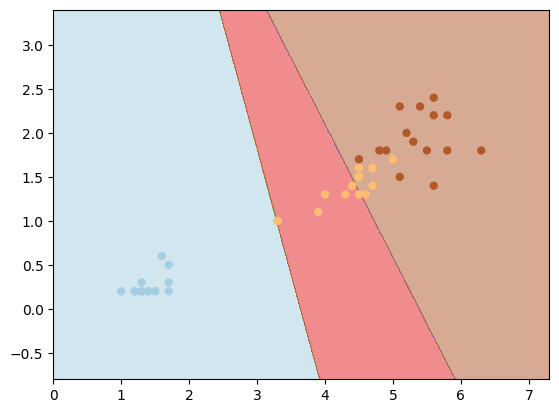

In [29]:
# When C = 0.01

lr_c1 = LogisticRegression(C=0.01)
lr_c1.fit(X_train,z_train)
plot_decision_boundary(X_test,z_test,lr_c1)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

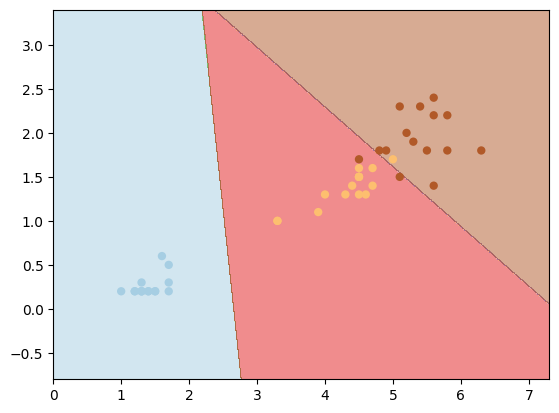

In [30]:
# When C = 100

lr_c2 = LogisticRegression(C=100)
lr_c2.fit(X_train,z_train)
plot_decision_boundary(X_test,z_test,lr_c2)

**Answer**

**With Standardized/Normalized data**

Text(0, 0.5, 'petal width')

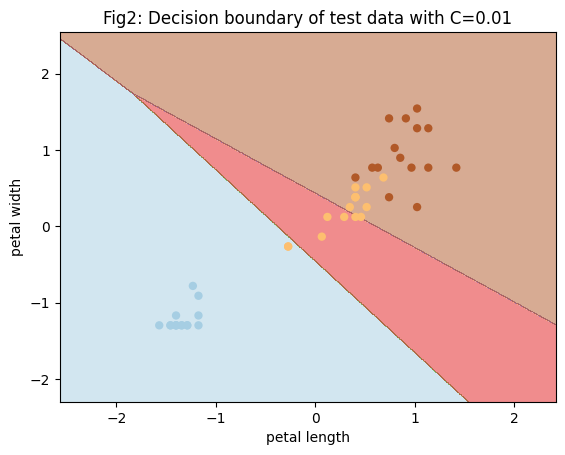

In [31]:
# When C = 0.01

lr_c3 = LogisticRegression(C = 0.01)
lr_c3.fit(X_train_scaled,z_train)

plot_decision_boundary(X_test_scaled,z_test,lr_c3)
plt.title('Fig2: Decision boundary of test data with C=0.01')
plt.xlabel('petal length')
plt.ylabel('petal width')

Text(0, 0.5, 'petal width')

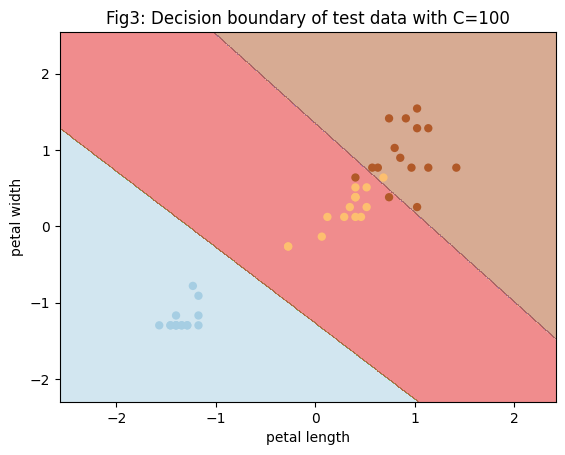

In [32]:
# When C = 100

lr_c4 = LogisticRegression(C = 100)
lr_c4.fit(X_train_scaled,z_train)

plot_decision_boundary(X_test_scaled,z_test,lr_c4)
plt.title('Fig3: Decision boundary of test data with C=100')
plt.xlabel('petal length')
plt.ylabel('petal width')

**Observation**
The C parameter is the regularization strength control parameter. Regularization refers to a way of avoiding the problem of overfitting and improving generalization of the model.

In Fig1, for a default value of c, the model classifies the test data almost correctly. but the two boundaries overlap at the 2,-2 plane and hence the data points belonging to class 1 label may get misclassified as label 0 or label 2.

Fig 2 shows effect of low c value which implies better regularization.

In fig 3, for a high value of c, the model seems to generalize the decision boundary such that it can classify
 new data points closer to the decision boundary. It is not forming a complex decision boundary to fit on all the data points available.

 We are looking forward to find a decision boundary that is more generalized for the model which can give low variance and low bias.

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

Text(0.5, 1.0, 'Decision boundary of training data')

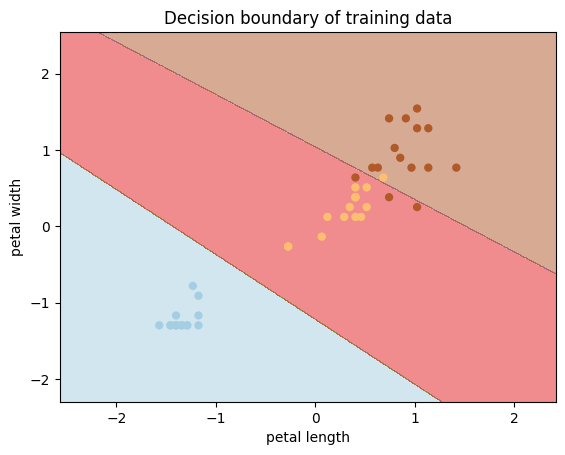

In [33]:
# Training the model using Support Vector Machine function from scikitlearn

from sklearn.svm import SVC

#initializing SVC model
svm = SVC(kernel = 'linear')

# training the SVC model
svm.fit(X_train_scaled,z_train)

zsvm_pred = svm.predict(X_test_scaled)

fig,  ax = plot_decision_boundary(X_test_scaled,z_test,svm)
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_title("Decision boundary of training data")

In [34]:
# calculating the accuracy of SVC model
accuracy = round(accuracy_score(z_test,zsvm_pred),2)
print(f'Accuracy score for the test data is {accuracy}')

Accuracy score for the test data is 0.91


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

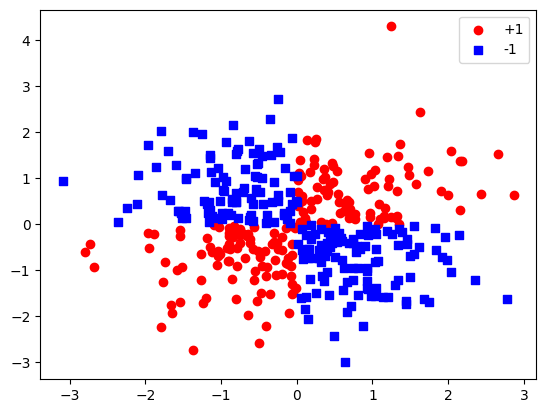

In [35]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

<span style="color:red">Insert your code below</span>.

In [36]:
# Running RBF on the kernel SVM model by choosing a gamma value of 0.1

svm_rbf = SVC(kernel='rbf', gamma=0.1)
svm_rbf.fit(X_r, y_r)

SVC(gamma=0.1)

**When Gamma = 0.1**

Text(0.5, 1.0, 'Non-linear decision boundary by SVM')

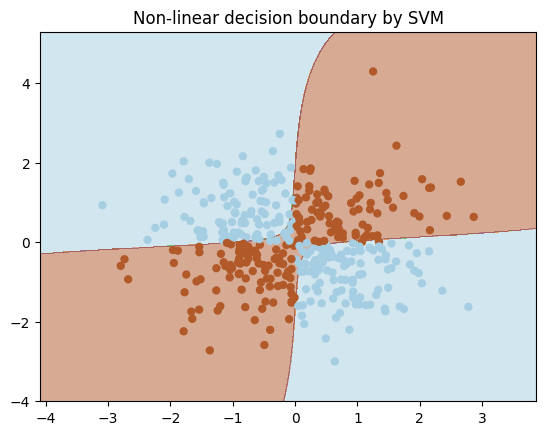

In [37]:
plot_decision_boundary(X=X_r, y=y_r, model=svm_rbf)
plt.title('Non-linear decision boundary by SVM')


**When gamma = 10**

Text(0.5, 1.0, 'Non-linear decision boundary by SVM')

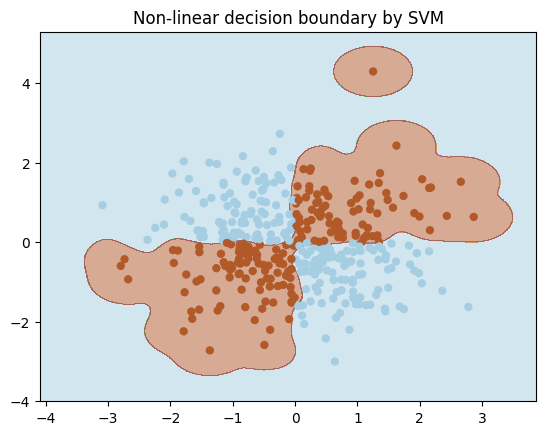

In [38]:
svm_rbf_1 = SVC(kernel='rbf', gamma=10)
svm_rbf_1.fit(X_r, y_r)

plot_decision_boundary(X=X_r, y=y_r, model=svm_rbf_1)
plt.title('Non-linear decision boundary by SVM')

**When gamma = 100**

Text(0.5, 1.0, 'Non-linear decision boundary by SVM')

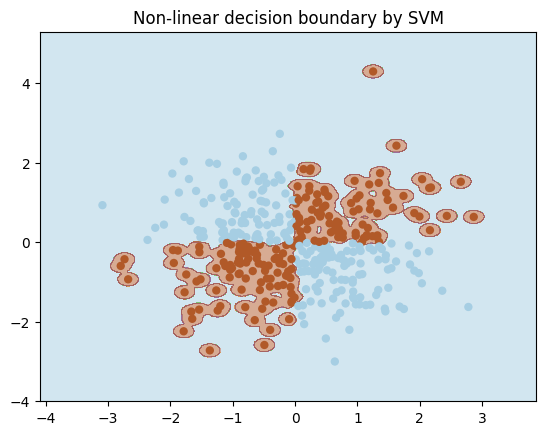

In [39]:
svm_rbf_2 = SVC(kernel='rbf', gamma=100)
svm_rbf_2.fit(X_r, y_r)

plot_decision_boundary(X=X_r, y=y_r, model=svm_rbf_2)
plt.title('Non-linear decision boundary by SVM')

**When gamma is default**

Text(0.5, 1.0, 'Non-linear decision boundary by SVM')

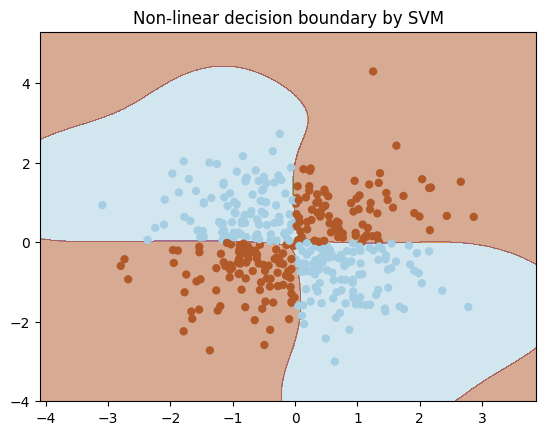

In [40]:
svm_rbf_3 = SVC(kernel='rbf')
svm_rbf_3.fit(X_r, y_r)

plot_decision_boundary(X=X_r, y=y_r, model=svm_rbf_3)
plt.title('Non-linear decision boundary by SVM')

**Observations**

Gamma in general controls the peak where we raise points to separate the hyperplane from one another.

With a higher gamma value, the data points have to be closer to the decision boundary to make an impact and this in turn may result in overfitting.

**SVM on IRIS data**

In [51]:
# Running RBF on the kernel SVM model by choosing a gamma value of 0.1

svm_iris = SVC(kernel='rbf')
svm_iris.fit(X_train_scaled, z_train)

SVC()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

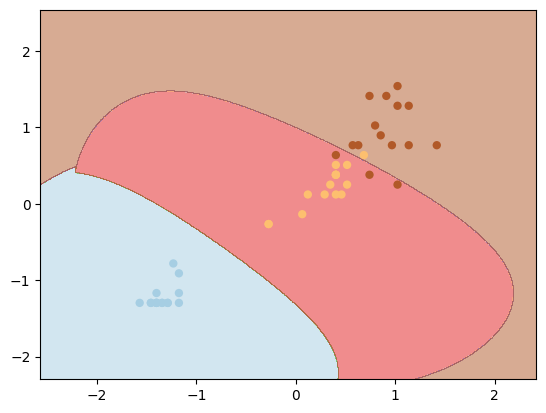

In [52]:
plot_decision_boundary(X_test_scaled,z_test,model = svm_iris)